## Практика 3

### Задание 1. Выгрузка данных

In [17]:
import pandas as pd
data = pd.read_csv('smartphone_evolution.csv')
data

,Brand,Model,OS,Release_Date,Battery,Processor,Memory,Primary_Storage,External_Storage,Display_Size,Display_Resolution,Display_Refresh_Rate,Primary_Camera,Front_Camera
0,ARCHOS,40 Cesium,Windows Phone 8.1,NaN,1950.0,Qualcomm Snapdragon 200,0.5,4.0,microSDXC,4.0,800 x 480,NaN,5.0,0.3
1,ARCHOS,40 Titanium,Android 4.2.2,NaN,1500.0,MediaTek,0.5,NaN,microSDHC,4.0,800 x 480,NaN,5.0,0.3
2,ARCHOS,40b Titanium,Android 4.2.2,NaN,1400.0,MediaTek,0.5,4.0,microSD,4.0,800 x 480,NaN,5.0,0.3
3,ARCHOS,45 Titanium,Android 4.2.2,NaN,1680.0,MediaTek,0.5,NaN,microSDHC,4.5,854 x 480,NaN,5.0,0.3
4,ARCHOS,45b Helium 4G,Android 4.4.4,NaN,1850.0,Qualcomm Snapdragon 410,0.5,4.0,microSDXC,4.5,854 x 480,NaN,5.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4532,vivo,Y11,Android 9.0 Pie,"Oct 22, 2019",5000.0,Qualcomm Snapdragon 439,3.0,32.0,microSDXC,6.3,1544 x 720,NaN,13.0,8
4533,vivo,Y19,Android 9.0 Pie,"Nov 01, 2019",5000.0,MediaTek Helio P65,4.0,128.0,microSDXC,6.5,2340 x 1080,NaN,16.0,16
4534,vivo,Y83 Pro,Android 8.1 Oreo,"Aug 22, 2018",3260.0,MediaTek Helio P22,4.0,64.0,microSDXC,6.2,1520 x 720,NaN,13.0,8
4535,vivo,Y91,Android 8.1 Oreo,"Jan 15, 2019",4030.0,MediaTek Helio P22,2.0,32.0,microSDXC,6.2,1520 x 720,NaN,13.0,8


### Задание 2. Содержимое данных и информация о них, а также их предобработка

In [18]:
print(data.head())
print(data.info())
if data.isna().sum().sum() > 0:
    data = data.dropna()
    data.index = range(len(data.index))
    print(data.info())

    Brand          Model                 OS Release_Date  Battery  \
0  ARCHOS      40 Cesium  Windows Phone 8.1          NaN   1950.0   
1  ARCHOS    40 Titanium      Android 4.2.2          NaN   1500.0   
2  ARCHOS   40b Titanium      Android 4.2.2          NaN   1400.0   
3  ARCHOS    45 Titanium      Android 4.2.2          NaN   1680.0   
4  ARCHOS  45b Helium 4G      Android 4.4.4          NaN   1850.0   

                 Processor  Memory  Primary_Storage External_Storage  \
0  Qualcomm Snapdragon 200     0.5              4.0        microSDXC   
1                 MediaTek     0.5              NaN        microSDHC   
2                 MediaTek     0.5              4.0          microSD   
3                 MediaTek     0.5              NaN        microSDHC   
4  Qualcomm Snapdragon 410     0.5              4.0        microSDXC   

   Display_Size Display_Resolution  Display_Refresh_Rate  Primary_Camera  \
0           4.0         800 x 480                    NaN             5.0   


### Задание 3. Построение столбчатой диаграммы

In [19]:
import plotly.express as px
fig = px.bar(
    x=data['External_Storage'].unique(),
    y=data['External_Storage'].value_counts())
fig.update_traces(marker=dict(line=dict(color='black', width=2), color=data['External_Storage'].value_counts(), coloraxis='coloraxis'))
fig.update_layout(
    title='Диаграмма смартфонов с разной расширяемой памятью', titlefont_size=20, title_x=0.5, title_y=0.99,
    xaxis_title='Вид расширяемой памяти', xaxis_title_font_size=16, xaxis_tickfont_size=14, xaxis_tickangle=315,
    yaxis_title='Количество смартфонов', yaxis_title_font_size=16, yaxis_tickfont_size=14,
    height=700,
    margin=dict(l=0,r=0,t=30,b=0)
)
fig.show()

### Задание 4. Построение круговой диаграммы

In [20]:
import plotly.graph_objects as go
fig = go.Figure(go.Pie(
    labels=data['Display_Refresh_Rate'].unique(),
    values=data['Display_Refresh_Rate'].value_counts(),
    marker=dict(line=dict(color='black', width=2))))
fig.update_traces(
    textfont_size=14,
    textinfo='label+percent')
fig.update_layout(
    title='Круговая диаграмма частоты обновления дисплея смартфонов',
    titlefont_size=20, title_x=0.5, title_y=0.99,
    height=700,
    margin=dict(l=0, r=0, t=30, b=0)
)
fig.show()

### Задание 5. Построение линейного графика

In [21]:
data['Release_Date'] = data['Release_Date'].apply(lambda x: x.split()[-1]).astype('int')
axis_x=data['Release_Date'].unique()
axis_x.sort()
axis_y = []
for i in axis_x:
    axis_y.append(data.loc[data['Release_Date'] == i, 'Release_Date'].shape[0])
fig = px.line(
    x=axis_x,
    y=axis_y,
    markers=True)
fig.update_traces(
    line_color='crimson',
    marker_color='white',
    marker_line_color='black',
    marker_line_width=2)
fig.update_layout(
    title='Линейный график смартфонов по годам', titlefont_size=20,
    title_x=0.5, title_y=0.99,
    xaxis_title='Год', xaxis_title_font_size=16, xaxis_tickfont_size=14, xaxis_tickangle=315,
    yaxis_title='Количество', yaxis_title_font_size=16, yaxis_tickfont_size=14,
    height=700,
    margin=dict(l=0,r=0,t=30,b=0)
)
fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
fig.show()

C:\Users\Artyom\AppData\Local\Temp\ipykernel_24124\1783042907.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Задание 6. Построение диаграмм с помощью matplotlib

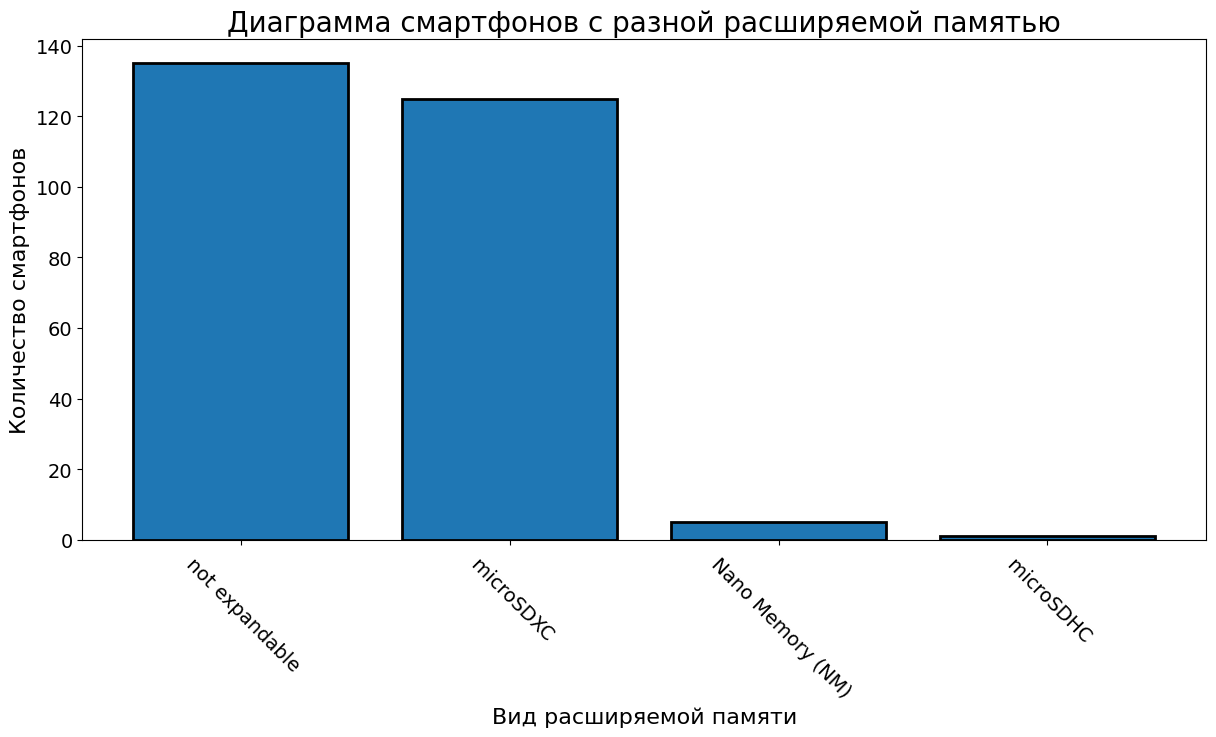

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14.5,6.5))
bar = plt.bar(data['External_Storage'].unique(),
              data['External_Storage'].value_counts(),
              edgecolor='black',
              linewidth=2)
plt.title('Диаграмма смартфонов с разной расширяемой памятью', fontsize=20)
plt.xlabel('Вид расширяемой памяти', fontsize=16)
plt.ylabel('Количество смартфонов', fontsize=16)
plt.xticks(fontsize=14, rotation=315)
plt.yticks(fontsize=14)
plt.show()

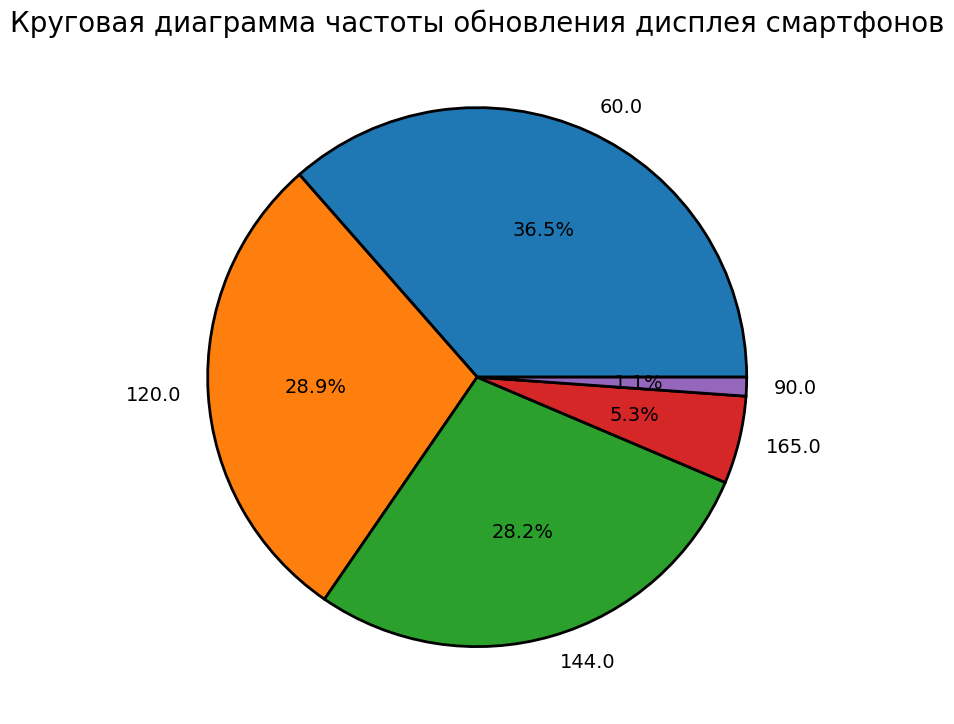

In [23]:
plt.figure(figsize=(20,8.75))
plt.title('Круговая диаграмма частоты обновления дисплея смартфонов', size=20)
plt.pie(
    data['Display_Refresh_Rate'].value_counts(),
    labels=data['Display_Refresh_Rate'].unique(),
    autopct='%1.1f%%', textprops=dict(fontsize=14),
    wedgeprops=dict(edgecolor='black', linewidth=2))
plt.show()

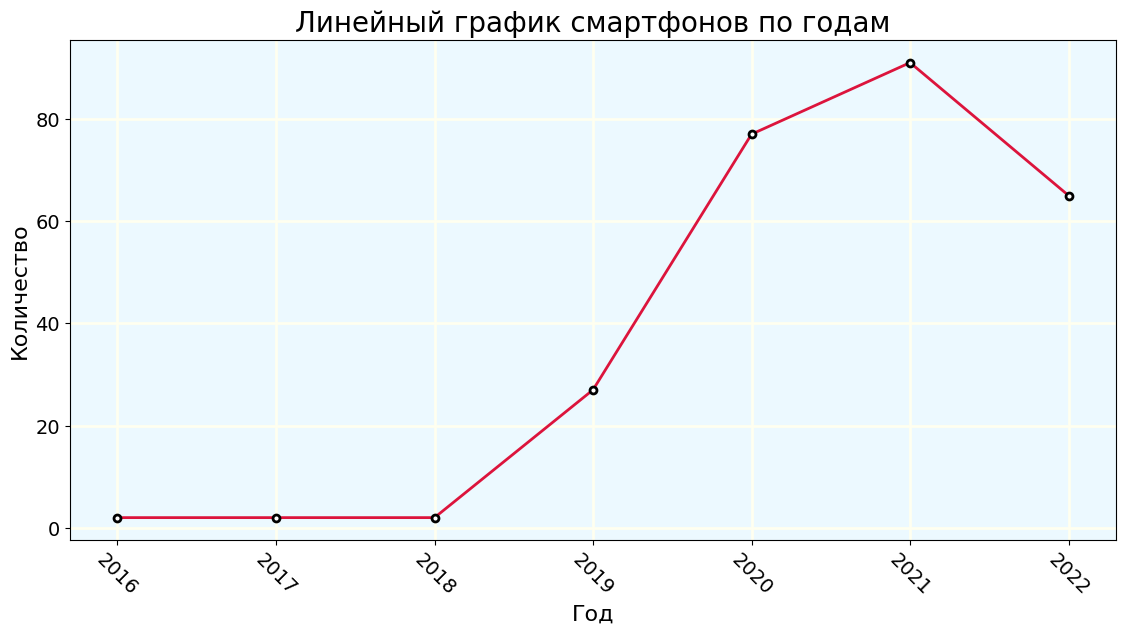

In [24]:
plt.figure(figsize=(13.5, 6.5))
plt.axes().set_facecolor('#ECF9FF')
plt.title('Линейный график смартфонов по годам', size=20)
plt.xlabel('Год', size=16)
plt.ylabel('Количество', size=16)
plt.xticks(size=14, rotation=315)
plt.yticks(size=14)
plt.grid(color='ivory', linewidth=2)
plt.plot(axis_x, axis_y,
         color='crimson', linewidth=2,
         marker='o', markersize=5, markerfacecolor='white',
         markeredgecolor='black', markeredgewidth=2)
plt.show()